In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
dataset = pd.read_csv('hotel_bookings.csv')
dataset.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## Data Cleaning

### Step 1 - Checking for null/Missing/Nan values

In [4]:
dataset1=pd.isna(dataset)
# Iterate over the columns in the dataframe
for column in dataset1.columns:
    # Check if the column contains the value True
    if True in dataset1[column].values:
        # Print the name of the column
        print(column)

children
country
agent
company


In [5]:
#printing count of null values and null value percentages for each column
null_count = dataset.isnull().sum()
null_percent = null_count / len(dataset) * 100
null_dataset = pd.DataFrame({'null_count': null_count, 'null_percent': null_percent})
null_dataset

,null_count,null_percent
hotel,0,0.000000
is_canceled,0,0.000000
lead_time,0,0.000000
arrival_date_year,0,0.000000
arrival_date_month,0,0.000000
arrival_date_week_number,0,0.000000
arrival_date_day_of_month,0,0.000000
stays_in_weekend_nights,0,0.000000
stays_in_week_nights,0,0.000000
adults,0,0.000000


As the columns 'agent' and 'company' have large number of missing/nullvalues we drop 'agent' and 'company' columns

In [6]:
dataset = dataset.drop(['agent','company'],axis=1)

In [7]:
dataset.shape

(119390, 30)

As the columns 'country' and 'children' has less number of missing values we just remove the missing value rows instead whole columns.

In [8]:
dataset.dropna(subset=["children","country"],inplace=True)

In [9]:
dataset.shape

(118898, 30)

In [10]:
#printing count of null values and null value percentages for each column
null_count = dataset.isnull().sum()
null_percent = null_count / len(dataset) * 100
null_dataset = pd.DataFrame({'null_count': null_count, 'null_percent': null_percent})
null_dataset

,null_count,null_percent
hotel,0,0.0
is_canceled,0,0.0
lead_time,0,0.0
arrival_date_year,0,0.0
arrival_date_month,0,0.0
arrival_date_week_number,0,0.0
arrival_date_day_of_month,0,0.0
stays_in_weekend_nights,0,0.0
stays_in_week_nights,0,0.0
adults,0,0.0


### Step 2 - Checking for Duplicate Values

In [11]:
# Check for duplicate rows
duplicate_rows = dataset[dataset.duplicated()]

# Print the duplicate rows
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicate_rows)

Duplicate Rows except first occurrence based on all columns are :
               hotel  is_canceled  lead_time  arrival_date_year  \
5       Resort Hotel            0         14               2015   
22      Resort Hotel            0         72               2015   
43      Resort Hotel            0         70               2015   
138     Resort Hotel            1          5               2015   
200     Resort Hotel            0          0               2015   
...              ...          ...        ...                ...   
119349    City Hotel            0        186               2017   
119352    City Hotel            0         63               2017   
119353    City Hotel            0         63               2017   
119354    City Hotel            0         63               2017   
119373    City Hotel            0        175               2017   

       arrival_date_month  arrival_date_week_number  \
5                    July                        27   
22                 

In [12]:
#drop the duplicate rows and retain only the one unique row
dataset.drop_duplicates(inplace=True)

In [13]:
dataset.shape

(86914, 30)

### Step 3 - Data Type Conversion

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86914 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           86914 non-null  object 
 1   is_canceled                     86914 non-null  int64  
 2   lead_time                       86914 non-null  int64  
 3   arrival_date_year               86914 non-null  int64  
 4   arrival_date_month              86914 non-null  object 
 5   arrival_date_week_number        86914 non-null  int64  
 6   arrival_date_day_of_month       86914 non-null  int64  
 7   stays_in_weekend_nights         86914 non-null  int64  
 8   stays_in_week_nights            86914 non-null  int64  
 9   adults                          86914 non-null  int64  
 10  children                        86914 non-null  float64
 11  babies                          86914 non-null  int64  
 12  meal                           

In [15]:
# As we have object datatype for reservation_status_date column, we convert it to datetime format
dataset['reservation_status_date'] = pd.to_datetime(dataset['reservation_status_date'])

# check the datatype of the column after conversion
print(dataset['reservation_status_date'].dtype)

datetime64[ns]


In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86914 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           86914 non-null  object        
 1   is_canceled                     86914 non-null  int64         
 2   lead_time                       86914 non-null  int64         
 3   arrival_date_year               86914 non-null  int64         
 4   arrival_date_month              86914 non-null  object        
 5   arrival_date_week_number        86914 non-null  int64         
 6   arrival_date_day_of_month       86914 non-null  int64         
 7   stays_in_weekend_nights         86914 non-null  int64         
 8   stays_in_week_nights            86914 non-null  int64         
 9   adults                          86914 non-null  int64         
 10  children                        86914 non-null  float64       
 11  b

### STEP 4 - Encoding Categorical Data

 1 : hotel -> City Hotel - 0,  Resort Hotel - 1

In [17]:
# Get the unique values in a column called "hotel"
unique_values = dataset['hotel'].unique()

# Print the unique values
print(unique_values)

# Create a LabelEncoder object and fit it to the unique values
label_encoder = LabelEncoder()
label_encoder.fit(unique_values)

# Apply the label encoding to the column
dataset['hotel'] = label_encoder.transform(dataset['hotel'])

# Print the encoded column
print(dataset['hotel'])

# Print the unique values
print(unique_values)

['Resort Hotel' 'City Hotel']
0         1
1         1
2         1
3         1
4         1
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: hotel, Length: 86914, dtype: int32
['Resort Hotel' 'City Hotel']


2 : Arrival_date_month -> 'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7,'August': 8,
'September': 9, 'October': 10, 'November': 11, 'December': 12

In [18]:
# Get the unique values in a column called "hotel"
unique_values = dataset['arrival_date_month'].unique()

# Print the unique values
print(unique_values)

['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']


In [19]:
# Create a dictionary that maps month names to numerical values
month_to_num = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

In [20]:
# Replace month names with numerical values
dataset['arrival_date_month'] = dataset['arrival_date_month'].map(month_to_num)

# Print the unique numerical values in the month column
print(dataset['arrival_date_month'].unique())

[ 7  8  9 10 11 12  1  2  3  4  5  6]


3. market_segment : 0 -> Aviation, 1 -> Complementary, 2 ->  Corporate, 3 -> Direct, 4 -> Groups , 5 -> Offline TA/TO, 6 -> Online TA

In [21]:
# Get the unique values in a column called "hotel"
unique_values = dataset['market_segment'].unique()

# Print the unique values
print(unique_values)

# Create a LabelEncoder object and fit it to the unique values
label_encoder = LabelEncoder()
label_encoder.fit(unique_values)

# Apply the label encoding to the column
dataset['market_segment'] = label_encoder.transform(dataset['market_segment'])

# Print the encoded column
print(dataset['market_segment'])

['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Aviation']
0         3
1         3
2         3
3         2
4         6
         ..
119385    5
119386    6
119387    6
119388    6
119389    6
Name: market_segment, Length: 86914, dtype: int32


In [22]:
# Get the unique values in a column called "hotel"
unique_values = dataset['market_segment'].unique()

# Print the unique values
print(unique_values)

[3 2 6 5 1 4 0]


4. meal: 0-> BB, 1 -> FB, 2 -> HB, 3 -> SC, 4 -> Undefined

In [23]:
# Get the unique values in a column called "hotel"
unique_values = dataset['meal'].unique()

# Print the unique values
print(unique_values)

# Create a LabelEncoder object and fit it to the unique values
label_encoder = LabelEncoder()
label_encoder.fit(unique_values)

# Apply the label encoding to the column
dataset['meal'] = label_encoder.transform(dataset['meal'])

# Print the encoded column
print(dataset['meal'])


['BB' 'FB' 'HB' 'SC' 'Undefined']
0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    2
Name: meal, Length: 86914, dtype: int32


In [24]:
# Get the unique values in a column called "hotel"
unique_values = dataset['meal'].unique()

# Print the unique values
print(unique_values)

[0 1 2 3 4]


In [25]:
dataset.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,342,2015,7,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,1,0,737,2015,7,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,1,0,7,2015,7,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,1,0,13,2015,7,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,1,0,14,2015,7,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


### STEP 5 - Remove Unwanted Columns

In [26]:
# As marketing segment and distribution channel implying the same data we drop the distribution_channel column
dataset = dataset.drop(['distribution_channel'],axis=1)

In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86914 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           86914 non-null  int32         
 1   is_canceled                     86914 non-null  int64         
 2   lead_time                       86914 non-null  int64         
 3   arrival_date_year               86914 non-null  int64         
 4   arrival_date_month              86914 non-null  int64         
 5   arrival_date_week_number        86914 non-null  int64         
 6   arrival_date_day_of_month       86914 non-null  int64         
 7   stays_in_weekend_nights         86914 non-null  int64         
 8   stays_in_week_nights            86914 non-null  int64         
 9   adults                          86914 non-null  int64         
 10  children                        86914 non-null  float64       
 11  b

In [28]:
dataset.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,342,2015,7,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,1,0,737,2015,7,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,1,0,7,2015,7,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,1,0,13,2015,7,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,1,0,14,2015,7,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


### STEP 6 - Handle Inconsistences in the data

In [29]:
# So adult, babies , children cannot be zero because for every booking there must be atleast a single occupant, so I found the rows with all three attributes zero and removed those rows from dataset
filter_a_b_c = (dataset.children == 0) & (dataset.adults == 0) & (dataset.babies == 0)
dataset[filter_a_b_c]
dataset.shape

(86914, 29)

In [30]:
# filter those zero valued rows from the dataset
dataset = dataset[~filter_a_b_c]
dataset.shape

(86753, 29)

### STEP 7 - Data Integration

In [31]:
#As babies and children nearly imply the same thing and we cannot get more insights by having two columns we will combine babies and children columns as Kids.
# Combining children and babies column as Kids column
dataset['Kids'] = dataset.children + dataset.babies
dataset.shape

(86753, 30)

In [32]:
# We don't have total guests count in the dataset so we make guests column by combining adult and kids column
dataset['Guests'] = dataset.adults + dataset.Kids
dataset.shape

(86753, 31)

In [33]:
dataset.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Kids,Guests
0,1,0,342,2015,7,27,1,0,0,2,...,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0.0,2.0
1,1,0,737,2015,7,27,1,0,0,2,...,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0.0,2.0
2,1,0,7,2015,7,27,1,0,1,1,...,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,0.0,1.0
3,1,0,13,2015,7,27,1,0,1,1,...,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,0.0,1.0
4,1,0,14,2015,7,27,1,0,2,2,...,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,0.0,2.0


### STEP 8 - Handling Outliers in the Data

In [34]:
# First we need to identify continuous and categorical features
def var(dataset):
    listunique = pd.DataFrame([[j,len(dataset[j].unique())] for j in dataset.columns])
    listunique.columns = ['name','uniques']
    Categoricalfeatures = set(listunique.name[(listunique.uniques<=13)|(listunique.name=='country')])
    Allfeatures = set(dataset.columns)
    Continuousfeatures = Allfeatures - Categoricalfeatures
    return Categoricalfeatures, Continuousfeatures


Categoricalfeatures,Continuousfeatures = var(dataset)

print("Continuousfeatures:", "(",len(Continuousfeatures),")",Continuousfeatures,"\n")
print("Categoricalfeatures:", "(",len(Categoricalfeatures),")",Categoricalfeatures)

Continuousfeatures: ( 13 ) {'stays_in_weekend_nights', 'arrival_date_day_of_month', 'Guests', 'arrival_date_week_number', 'previous_bookings_not_canceled', 'days_in_waiting_list', 'previous_cancellations', 'adr', 'stays_in_week_nights', 'booking_changes', 'adults', 'reservation_status_date', 'lead_time'} 

Categoricalfeatures: ( 18 ) {'assigned_room_type', 'children', 'hotel', 'is_repeated_guest', 'country', 'is_canceled', 'meal', 'required_car_parking_spaces', 'reservation_status', 'deposit_type', 'market_segment', 'customer_type', 'total_of_special_requests', 'Kids', 'arrival_date_year', 'reserved_room_type', 'arrival_date_month', 'babies'}


In [35]:
dataset[Continuousfeatures].describe()

C:\Users\rakes\AppData\Local\Temp\ipykernel_14108\66753961.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  dataset[Continuousfeatures].describe()


,stays_in_weekend_nights,arrival_date_day_of_month,Guests,arrival_date_week_number,previous_bookings_not_canceled,days_in_waiting_list,previous_cancellations,adr,stays_in_week_nights,booking_changes,adults,lead_time
count,86753.000000,86753.000000,86753.000000,86753.000000,86753.000000,86753.000000,86753.000000,86753.000000,86753.000000,86753.000000,86753.000000,86753.000000
mean,1.006882,15.818635,2.032437,26.838830,0.176801,0.750395,0.030224,106.756917,2.627460,0.268775,1.882091,80.278803
std,1.024309,8.834789,0.789787,13.649083,1.719219,10.028305,0.369819,54.839562,2.030166,0.711478,0.621202,86.108773
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,8.000000,2.000000,16.000000,0.000000,0.000000,0.000000,72.290000,1.000000,0.000000,2.000000,12.000000
50%,1.000000,16.000000,2.000000,27.000000,0.000000,0.000000,0.000000,98.670000,2.000000,0.000000,2.000000,50.000000
75%,2.000000,23.000000,2.000000,37.000000,0.000000,0.000000,0.000000,134.140000,4.000000,0.000000,2.000000,125.000000
max,16.000000,31.000000,55.000000,53.000000,72.000000,391.000000,26.000000,5400.000000,40.000000,18.000000,55.000000,737.000000


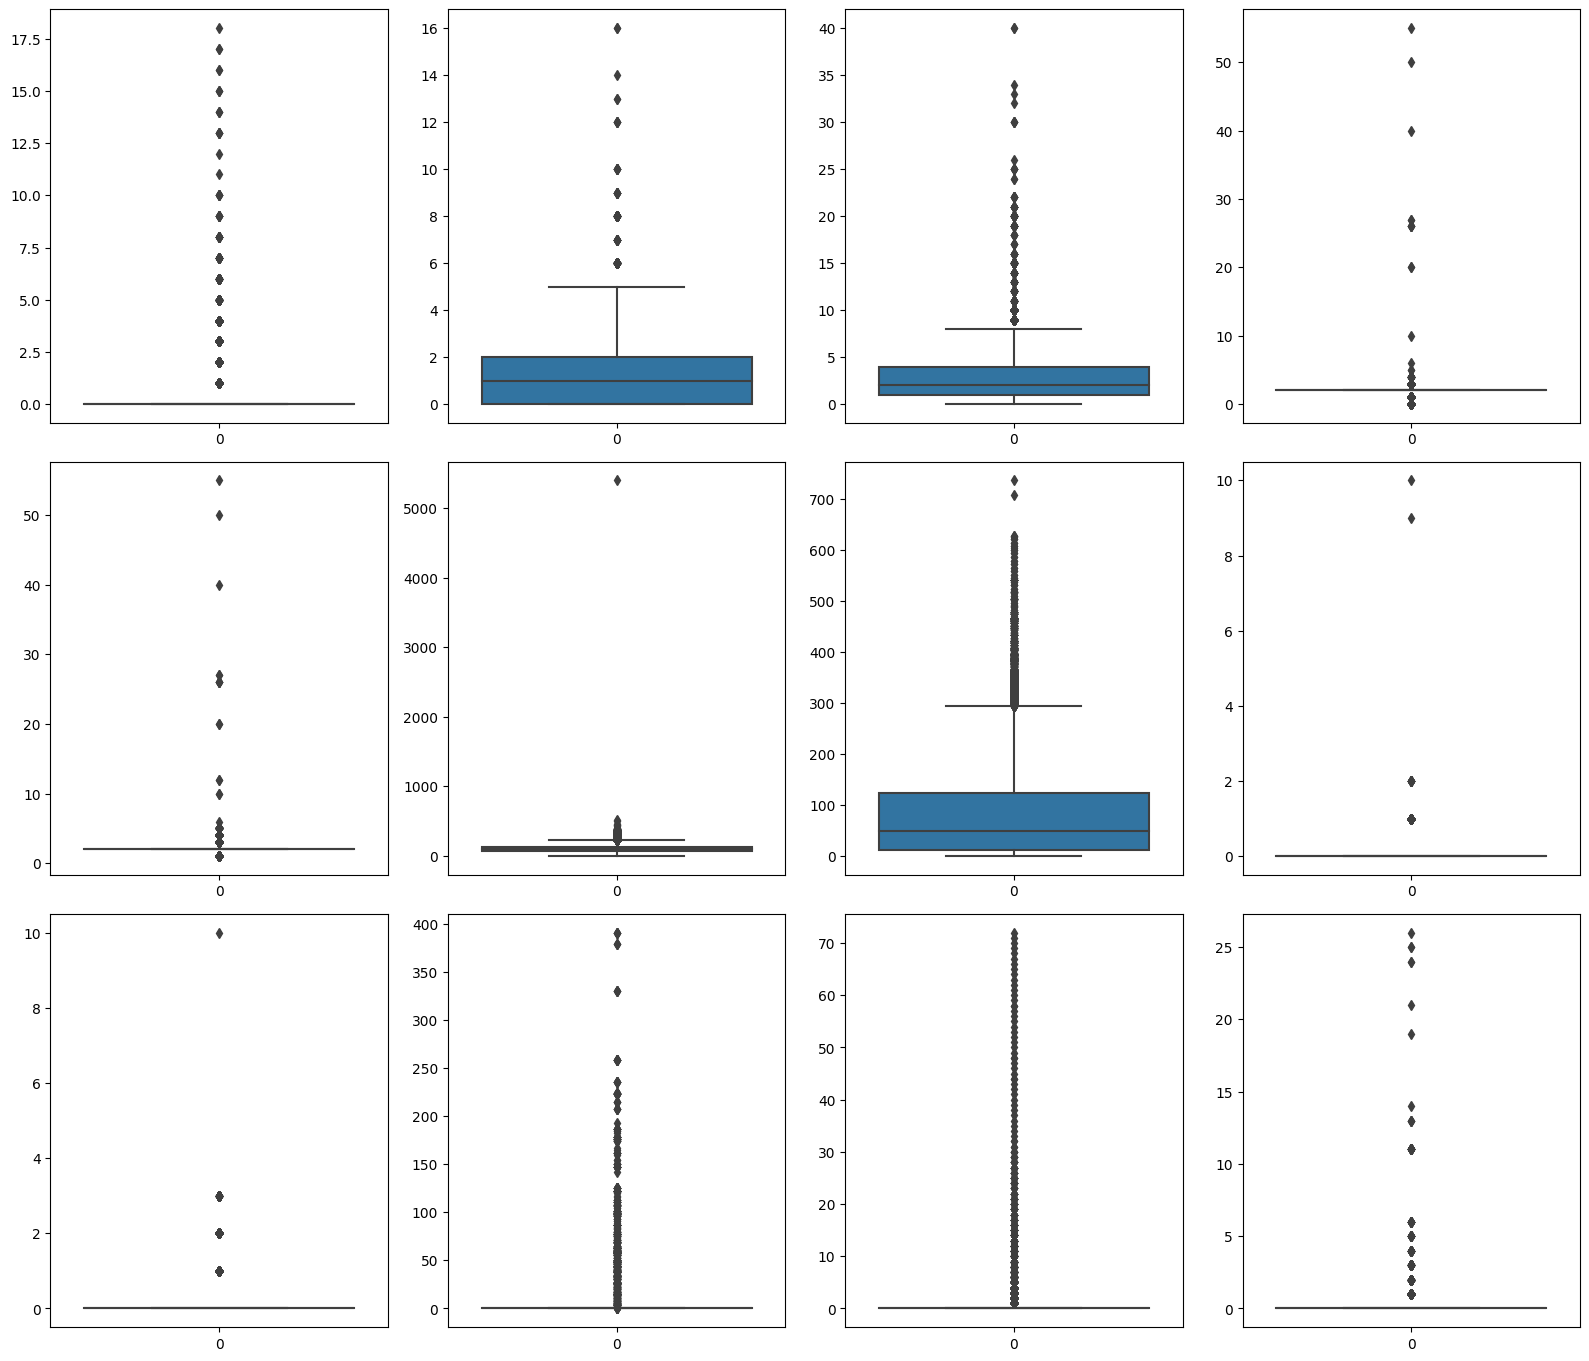

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['booking_changes','stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'Guests','adr','lead_time','babies','children','days_in_waiting_list','previous_bookings_not_canceled','previous_cancellations']
data = dataset

n = 1
plt.figure(figsize=(16,18))
for feature in features:
    plt.subplot(4,4,n)
    sns.boxplot(data[feature])
    n+=1
    plt.tight_layout()

In [37]:
# we can see from the box plots and data description that many of the continuous features have outliers, so now let's treat those outliers by imputing values.

dataset.loc[dataset.adults > 4,'adults']=  4

dataset.loc[dataset.booking_changes > 5,'booking_changes']=  5

dataset.loc[dataset.lead_time > 500,'lead_time']=500

dataset.loc[dataset.previous_bookings_not_canceled >0,'previous_bookings_not_canceled']=  1

dataset.loc[dataset.previous_cancellations > 0,'previous_cancellations']= 1

dataset.loc[dataset.days_in_waiting_list >  0,'days_in_waiting_list'  ]=  1

dataset.loc[dataset.stays_in_weekend_nights >=  5,'stays_in_weekend_nights']=  5

dataset.loc[dataset.stays_in_week_nights > 10,'stays_in_week_nights']= 10


In [38]:
# Now let's see the categorical variables.

dataset[Categoricalfeatures].describe()

C:\Users\rakes\AppData\Local\Temp\ipykernel_14108\1395019141.py:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  dataset[Categoricalfeatures].describe()


,children,hotel,is_repeated_guest,is_canceled,meal,required_car_parking_spaces,market_segment,total_of_special_requests,Kids,arrival_date_year,arrival_date_month,babies
count,86753.000000,86753.000000,86753.000000,86753.000000,86753.000000,86753.000000,86753.000000,86753.000000,86753.000000,86753.000000,86753.000000,86753.000000
mean,0.139511,0.386154,0.038731,0.276325,0.559900,0.083548,5.085058,0.699872,0.150346,2016.211900,6.475903,0.010835
std,0.457232,0.486869,0.192953,0.447182,1.082513,0.280557,1.336923,0.831978,0.473062,0.685937,3.091736,0.113614
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,2016.000000,4.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,2016.000000,7.000000,0.000000
75%,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,6.000000,1.000000,0.000000,2017.000000,9.000000,0.000000
max,10.000000,1.000000,1.000000,1.000000,4.000000,8.000000,6.000000,5.000000,10.000000,2017.000000,12.000000,10.000000


In [39]:
# if we see categorical variables there are some extreme values for some features like babies, children, kids, required_car_parking_spaces so let's impute those extreme values with zeroes.

dataset.loc[dataset.babies > 8,'babies'] = 0

dataset.loc[dataset.children  > 8,'children']= 0

dataset.loc[dataset.Kids > 8,'Kids'] = 0

dataset.loc[dataset.required_car_parking_spaces > 5,'required_car_parking_spaces'] = 0


In [40]:
dataset[Categoricalfeatures].describe()

C:\Users\rakes\AppData\Local\Temp\ipykernel_14108\3278617650.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  dataset[Categoricalfeatures].describe()


,children,hotel,is_repeated_guest,is_canceled,meal,required_car_parking_spaces,market_segment,total_of_special_requests,Kids,arrival_date_year,arrival_date_month,babies
count,86753.000000,86753.000000,86753.000000,86753.000000,86753.000000,86753.000000,86753.000000,86753.000000,86753.000000,86753.000000,86753.000000,86753.000000
mean,0.139396,0.386154,0.038731,0.276325,0.559900,0.083363,5.085058,0.699872,0.150012,2016.211900,6.475903,0.010616
std,0.456005,0.486869,0.192953,0.447182,1.082513,0.277970,1.336923,0.831978,0.469733,0.685937,3.091736,0.104051
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,2016.000000,4.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,2016.000000,7.000000,0.000000
75%,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,6.000000,1.000000,0.000000,2017.000000,9.000000,0.000000
max,3.000000,1.000000,1.000000,1.000000,4.000000,3.000000,6.000000,5.000000,3.000000,2017.000000,12.000000,2.000000


### STEP 9 - Normalize the data

In [41]:
dataset.var()

C:\Users\rakes\AppData\Local\Temp\ipykernel_14108\2458428038.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.var()


hotel                                0.237042
is_canceled                          0.199972
lead_time                         7370.794126
arrival_date_year                    0.470509
arrival_date_month                   9.558833
arrival_date_week_number           186.297475
arrival_date_day_of_month           78.053490
stays_in_weekend_nights              0.986304
stays_in_week_nights                 3.570134
adults                               0.253926
children                             0.207941
babies                               0.010827
meal                                 1.171834
market_segment                       1.787364
is_repeated_guest                    0.037231
previous_cancellations               0.018702
previous_bookings_not_canceled       0.036752
booking_changes                      0.438224
days_in_waiting_list                 0.009759
adr                               3007.377580
required_car_parking_spaces          0.077268
total_of_special_requests         

From the above it is evident that lead_time and adr have very high amount of variance so to remove this we use log transformation on these columns, this is done because when we apply regression models, these extreme values can have a disproportionate influence on the results. so I am applying the log transformation to reduce the effect/magnitude of the extreme values.


In [42]:
# dataset_log = dataset
# dataset_log['lead_time']=np.log(dataset_log['lead_time']+1)
# dataset_log['adr'] = np.log(dataset_log['adr'] + 1)

In [43]:
# dataset_log.var()

C:\Users\rakes\AppData\Local\Temp\ipykernel_14108\1270728040.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = dataset.corr()


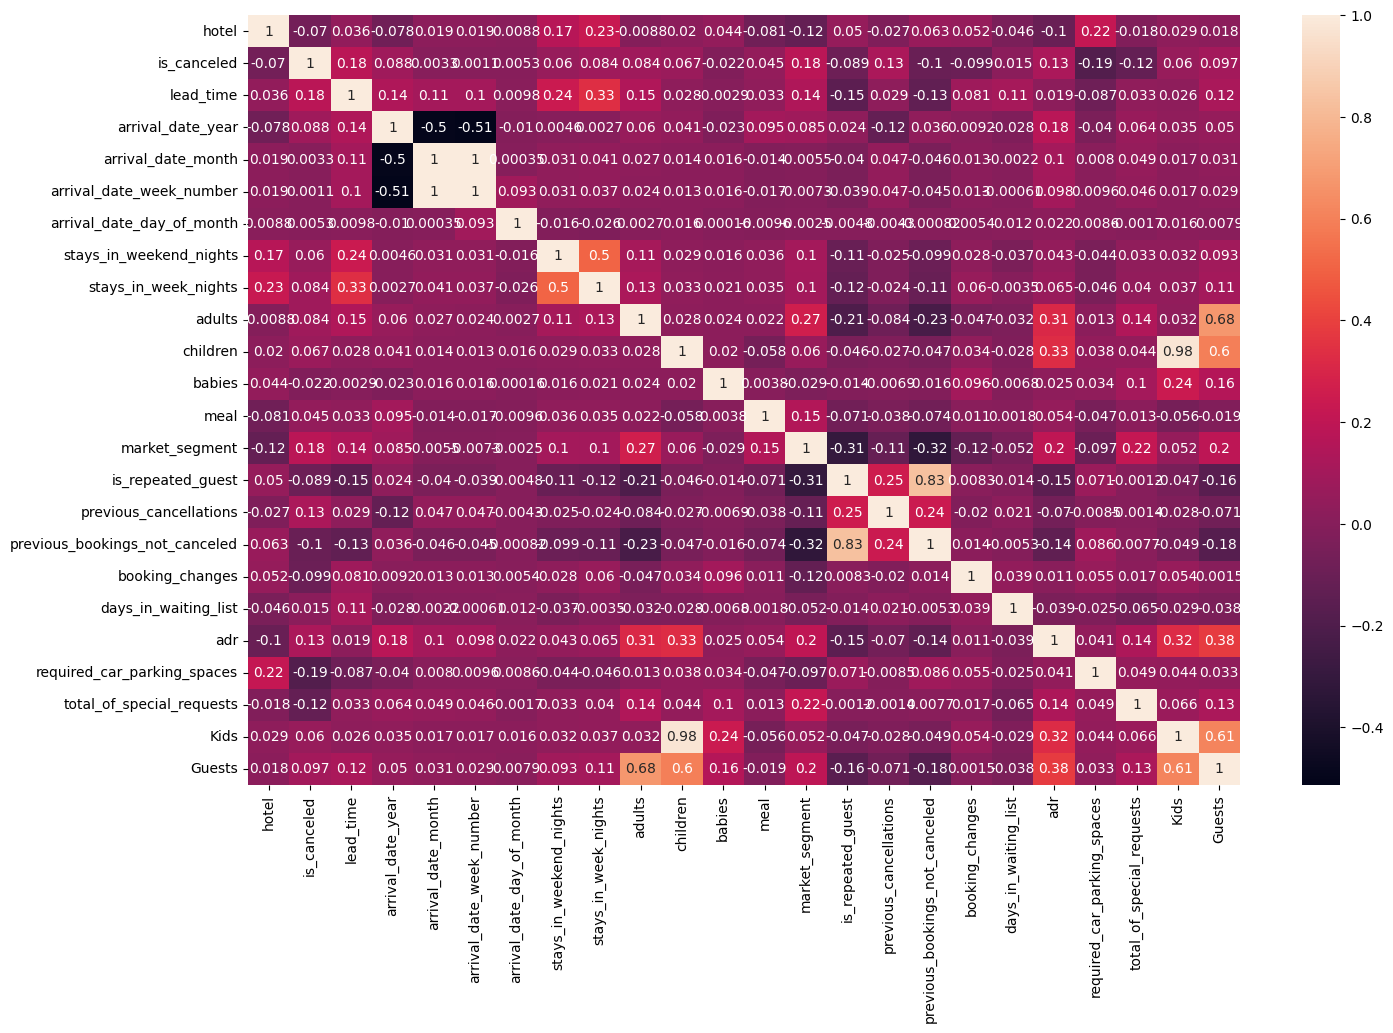

In [44]:
import seaborn as sn
import matplotlib.pyplot as plt
corrMatrix = dataset.corr()
plt.figure(figsize=(16,10))
sn.heatmap ( corrMatrix , annot = True )
plt.show ( )

### STEP 10 - Renaming the Columns

In [45]:
print(dataset.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'deposit_type', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'Kids', 'Guests'],
      dtype='object')


In [46]:
# Rename the columns using a dictionary
dataset = dataset.rename(columns={'arrival_date_year': 'arrival_year', 'arrival_date_month': 'arrival_month', 'arrival_date_week_number': 'arrival_week_number', 'stays_in_weekend_nights' : 'weekend_night_stays', 'stays_in_week_nights' : 'week_night_stays', 'days_in_waiting_list' : 'waiting_days', 'Kids':'kids', 'Guests':'guests','previous_cancellations' : 'prev_cancel','total_of_special_requests': 'special_requests','previous_bookings_not_canceled':'previous_uncancelled_bookings'})

# Print the new column names
print(dataset.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_week_number', 'arrival_date_day_of_month',
       'weekend_night_stays', 'week_night_stays', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'is_repeated_guest',
       'prev_cancel', 'previous_uncancelled_bookings', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'waiting_days',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'special_requests', 'reservation_status', 'reservation_status_date',
       'kids', 'guests'],
      dtype='object')


# Exploratory Data Analysis

## Step 1 - Barplot analysis

In [47]:
# #Plotting is done between arrival_month and cancelled bookings
# print(dataset['hotel'])
# print(dataset.loc[dataset['hotel'] == 0].shape[0])
# print(dataset.loc[dataset['hotel'] == 1].shape[0])

# #extracting only cancelled bookings from the data set
# dataset_cancelled = dataset.loc[dataset['is_canceled'] == 1]
# plt.figure(figsize=(14,5))

# sns.countplot(x="arrival_month",data=dataset_cancelled,palette="crest",edgecolor="blue")
# plt.title("Cancellations trend over Arrival month")
# plt.show()


# #Plotting is done between arrival_date_month and repeated bookings
# dataset_repeated_guests = dataset.loc[dataset['is_repeated_guest'] == 1]
# plt.figure(figsize=(14,5))

# sns.countplot(x="arrival_month",data=dataset_repeated_guests,palette="ocean",edgecolor="black")
# plt.title("Repeated guests trend over Arrival month")
# plt.show()


## Step 2 - Statistical distribution over Pie chart 

In [48]:
# #pie chart is used to observe the quantification of bookings count in different features
# import plotly.express as px
# for feature in ['reserved_room_type','assigned_room_type', 'customer_type']:
#     custom_aggregation = {}
#     custom_aggregation["arrival_date_day_of_month"] = "count"

    
#     dataset_agg = dataset.groupby(feature).agg(custom_aggregation)
#     dataset_agg.columns = ["Booking Count"]
#     dataset_agg[feature] = dataset_agg.index

#     labels = dataset_agg[feature].tolist()
#     values = dataset_agg['Booking Count'].tolist()

#     pie_figure = px.pie(dataset_agg, values=values, names=labels)
#     pie_figure.update_traces(textposition='inside')
#     pie_figure.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
#     pie_figure['layout'].update(height=550, width=500, title='Booking by ' + feature, boxmode='group')
#     pie_figure.show()


## Step 3 - Correlation matrix

In [49]:
# #correlation matrix plot 
# import seaborn as sn
# import matplotlib.pyplot as plt
# corrMatrix = dataset.corr()
# #sorting the correlation values to get highly correlated and poorly correlated features w.r.t 'is canceled' target variable
# print(corrMatrix['is_canceled'].sort_values(kind="quicksort"))
# plt.figure(figsize=(18,8))
# sn.heatmap ( corrMatrix , annot = True )
# plt.show()

## Step 4 - Line plot

In [50]:
# #Line plot, identify the relation between two features for different hotel types
# dataset_repeated = dataset.loc[dataset['is_repeated_guest'] == 1]
# plt.figure(figsize=(12,7))
# sns.lineplot(x=dataset["reserved_room_type"],y=dataset["adr"],marker="o",hue=dataset["hotel"])
# plt.title("Average Daily Rate On Weekend-Night");

## Step 5 - Scatter plot of ‘lead_time’, ‘market_segment’, ‘adr’, ‘guests’, ‘arrival_year’, ‘adults’ against target variable

In [51]:
# import matplotlib.pyplot as plt
# #features = ['lead_time', 'market_segment', 'adr', 'guests', 'arrival_year', 'adults']

# features = ['adults']
# for feature in features:   

#     plt.figure(figsize=(15, 10))
#     plt.title('Relationship between ' + feature + 'and previous cancellations')
#     sns.scatterplot(x=feature, y='prev_cancel', data=dataset)
    

## Step 6 - Box Plot

In [52]:
# figure, ax = plt.subplots(ncols=4, nrows=4, figsize=(20,20))
# index = 0
# ax = ax.flatten()
# for feature,value in dataset.iteritems():
#   try:
#     sns.boxplot(y=feature, data=dataset,color = 'g', ax=ax[index])
#     index = index + 1
#   except:
#     pass
    

# plt.tight_layout(pad=5, w_pad=5, h_pad=5)

## Step 7 - Cat plot analysis

In [53]:
# # Generate categorical plots for features
# print(dataset.columns)
# for col in ["adults", "children", "babies"]:
#     sns.catplot(x=col, y="is_canceled", data=dataset, kind="point", height=4, aspect=2).set(xlabel=None)
#     plt.title(col)

## Step 8 - Pair Plot

In [54]:
# g = sns.PairGrid(dataset)
# g.map_upper(sns.scatterplot,color='red')
# g.map_lower(sns.scatterplot, color='green')
# g.map_diag(plt.hist)

## Step 9 - Violin Plot

In [55]:
# plt.figure(figsize = (12,6))
# sns.violinplot(x='deposit_type',y='hotel', hue="is_canceled", data=dataset, bw=.2, cut=2, linewidth=2, iner= 'box', split = True)
# sns.despine(left=True)
# plt.title('deposit_type vs hotel vs cancellation', weight='bold')

## Step 10 - Regression Plot

In [56]:
# # We group the lead time and use leadtimes with >10 transactions for graph.
# leadcancelleddata = dataset.groupby("lead_time")["is_canceled"].describe()
# leadcancelleddatagrouped = leadcancelleddata.loc[leadcancelleddata["count"] >= 10]

# # Plotting the graph
# plt.figure(figsize=(8, 6))
# sns.regplot(x=leadcancelleddatagrouped.index, y=leadcancelleddatagrouped["mean"].values * 100, color='red')
# plt.title("lead_time vs cancellations", fontsize=16)
# plt.xlabel("lead_time", fontsize=16)
# plt.ylabel("cancellation_percent", fontsize=16)
# plt.show()

## Processing the data for modelling

## Encoding String columns country, reserved_room_type, assigned_room_type, customer_type, deposit_type, Arrival Year

In [57]:
# Get the unique values in a column called "country"
unique_values = dataset['country'].unique()

# Print the unique values
print(unique_values)

['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC'
 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR'
 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI' 'SAU'
 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB' 'NPL'
 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IRQ' 'HND' 'RWA' 'KHM'
 'MCO' 'BGD' 'IMN' 'TJK' 'NIC' 'BEN' 'VGB' 'TZA' 'GAB' 'GHA' 'TMP' 'GLP'
 'KEN' 'LIE' 'GNB' 'MNE' 'UMI' 'MYT' 'FRO' 'MMR' 'PAN' 'BFA' 'LBY' 'MLI'
 'NAM' 'BOL' 'PRY' 'BRB' 'ABW' 'AIA' 'SLV' 'DMA' 'PY

In [58]:
# Create a LabelEncoder object and fit it to the unique values
label_encoder = LabelEncoder()
label_encoder.fit(unique_values)

# Apply the label encoding to the column
dataset['country'] = label_encoder.transform(dataset['country'])

# Print the encoded column
print(dataset['country'])

0         135
1         135
2          59
3          59
4          59
         ... 
119385     15
119386     56
119387     43
119388     59
119389     43
Name: country, Length: 86753, dtype: int32


In [59]:
# Get the unique values in a column called "reserved_room_type"
unique_values = dataset['reserved_room_type'].unique()

# Print the unique values
print(unique_values)

['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'B']


In [60]:
# Create a LabelEncoder object and fit it to the unique values
label_encoder = LabelEncoder()
label_encoder.fit(unique_values)

# Apply the label encoding to the column
dataset['reserved_room_type'] = label_encoder.transform(dataset['reserved_room_type'])

# Print the encoded column
print(dataset['reserved_room_type'])

0         2
1         2
2         0
3         0
4         0
         ..
119385    0
119386    4
119387    3
119388    0
119389    0
Name: reserved_room_type, Length: 86753, dtype: int32


In [61]:
# Get the unique values in a column called "assigned_room_type"
unique_values = dataset['assigned_room_type'].unique()

# Print the unique values
print(unique_values)

['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'L' 'K']


In [62]:
# Create a LabelEncoder object and fit it to the unique values
label_encoder = LabelEncoder()
label_encoder.fit(unique_values)

# Apply the label encoding to the column
dataset['assigned_room_type'] = label_encoder.transform(dataset['assigned_room_type'])

# Print the encoded column
print(dataset['assigned_room_type'])

0         2
1         2
2         2
3         0
4         0
         ..
119385    0
119386    4
119387    3
119388    0
119389    0
Name: assigned_room_type, Length: 86753, dtype: int32


In [63]:
# Get the unique values in a column called "customer_type"
unique_values = dataset['customer_type'].unique()

# Print the unique values
print(unique_values)

['Transient' 'Contract' 'Transient-Party' 'Group']


In [64]:
# Create a LabelEncoder object and fit it to the unique values
label_encoder = LabelEncoder()
label_encoder.fit(unique_values)

# Apply the label encoding to the column
dataset['customer_type'] = label_encoder.transform(dataset['customer_type'])

# Print the encoded column
print(dataset['customer_type'])

0         2
1         2
2         2
3         2
4         2
         ..
119385    2
119386    2
119387    2
119388    2
119389    2
Name: customer_type, Length: 86753, dtype: int32


In [65]:
# Get the unique values in a column called "country"
unique_values = dataset['deposit_type'].unique()

# Print the unique values
print(unique_values)

['No Deposit' 'Refundable' 'Non Refund']


In [66]:
# Create a LabelEncoder object and fit it to the unique values
label_encoder = LabelEncoder()
label_encoder.fit(unique_values)

# Apply the label encoding to the column
dataset['deposit_type'] = label_encoder.transform(dataset['deposit_type'])

# Print the encoded column
print(dataset['deposit_type'])

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: deposit_type, Length: 86753, dtype: int32


In [67]:
# Get the unique values in a column called "country"
unique_values = dataset['deposit_type'].unique()

# Print the unique values
print(unique_values)

[0 2 1]


In [68]:
# Get the unique values in a column called "country"
unique_values = dataset['arrival_year'].unique()

# Print the unique values
print(unique_values)

[2015 2016 2017]


In [69]:
# Create a LabelEncoder object and fit it to the unique values
label_encoder = LabelEncoder()
label_encoder.fit(unique_values)

# Apply the label encoding to the column
dataset['arrival_year'] = label_encoder.transform(dataset['arrival_year'])

# Print the encoded column
print(dataset['arrival_year'])

0         0
1         0
2         0
3         0
4         0
         ..
119385    2
119386    2
119387    2
119388    2
119389    2
Name: arrival_year, Length: 86753, dtype: int64


## Drop some unwanted columns like reservation_status, reservation_status_date

In [70]:
correlation = dataset.corr()['is_canceled'].abs().sort_values(ascending = True)
correlation

C:\Users\rakes\AppData\Local\Temp\ipykernel_14108\4245058816.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = dataset.corr()['is_canceled'].abs().sort_values(ascending = True)


arrival_week_number              0.001089
arrival_month                    0.003332
arrival_date_day_of_month        0.005327
waiting_days                     0.015067
babies                           0.021676
customer_type                    0.031001
meal                             0.045317
reserved_room_type               0.046926
weekend_night_stays              0.059610
kids                             0.059810
assigned_room_type               0.060118
children                         0.066557
hotel                            0.069510
week_night_stays                 0.083903
adults                           0.084302
arrival_year                     0.087723
is_repeated_guest                0.089300
country                          0.097190
guests                           0.097243
booking_changes                  0.099017
previous_uncancelled_bookings    0.101116
special_requests                 0.122146
adr                              0.125695
prev_cancel                      0

In [71]:
dataset = dataset.drop(['reservation_status','reservation_status_date', 'waiting_days', 'country', 'booking_changes', 'arrival_week_number', 'arrival_month', 'arrival_date_day_of_month'],axis=1)

## Normalizing the data below

In [72]:
# dataset.to_csv('D:/University at Buffalo CSE/Spring Semester 2023/CSE 587 Data Intensive Computing/Project/hotel_bookings/output.csv', index=False)

In [73]:
dataset['lead_time'] = np.log(dataset['lead_time'] + 1)
# dataset['arrival_week_number'] = np.log(dataset['arrival_week_number'] + 1)
# dataset['arrival_date_day_of_month'] = np.log(dataset['arrival_date_day_of_month'] + 1)
dataset.loc[dataset['adr']<0,'adr']=0
dataset['adr'] = np.log(dataset['adr'] + 1)

In [74]:
correlation = dataset.corr()['is_canceled'].abs().sort_values(ascending = True)
correlation

babies                           0.021676
customer_type                    0.031001
meal                             0.045317
reserved_room_type               0.046926
weekend_night_stays              0.059610
kids                             0.059810
assigned_room_type               0.060118
children                         0.066557
hotel                            0.069510
week_night_stays                 0.083903
adults                           0.084302
arrival_year                     0.087723
is_repeated_guest                0.089300
guests                           0.097243
previous_uncancelled_bookings    0.101116
adr                              0.118137
special_requests                 0.122146
prev_cancel                      0.126658
deposit_type                     0.137384
market_segment                   0.180605
required_car_parking_spaces      0.185317
lead_time                        0.238243
is_canceled                      1.000000
Name: is_canceled, dtype: float64

In [75]:
#dataset.to_csv('D:/University at Buffalo CSE/Spring Semester 2023/CSE 587 Data Intensive Computing/Project/hotel_bookings/output.csv', index=False)

# Feature Selection

In [76]:
X = dataset.iloc[:, [0] + list(range(2, len(dataset.columns)))]
y = dataset.iloc[:, 1]

## Splitting the data into train and test

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=0)

## KNN Model

## Select optimal K-value

In [78]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

Minimum error:- 0.22104818258664413 at K = 7


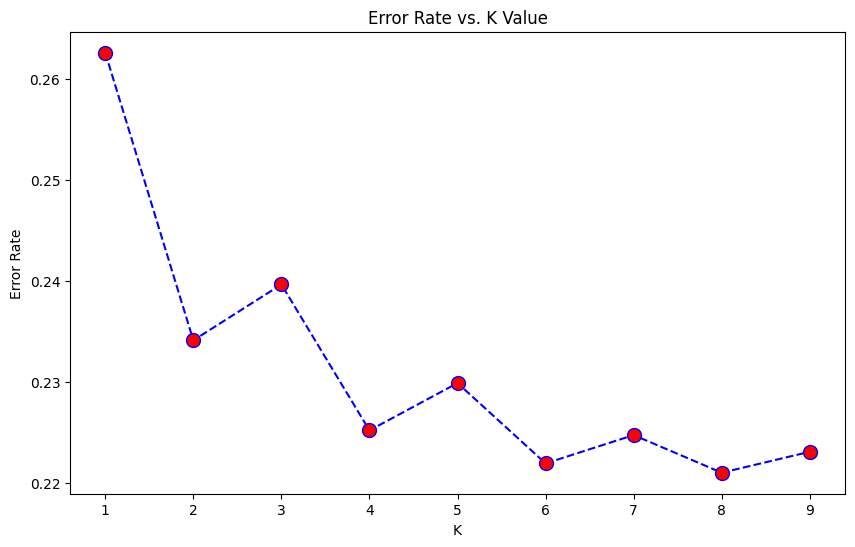

In [79]:
error_rate = []
for i in range(1,10):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

## Results Graphs for KNN Model

In [80]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
acc_knn = accuracy_score(y_test, y_pred_knn)
conf = confusion_matrix(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)

print(f"Accuracy Score of KNN is : {acc_knn}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of KNN is : 0.7789518174133558
Confusion Matrix : 
[[17193  1662]
 [ 4091  3080]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.81      0.91      0.86     18855
           1       0.65      0.43      0.52      7171

    accuracy                           0.78     26026
   macro avg       0.73      0.67      0.69     26026
weighted avg       0.76      0.78      0.76     26026



<Axes: >

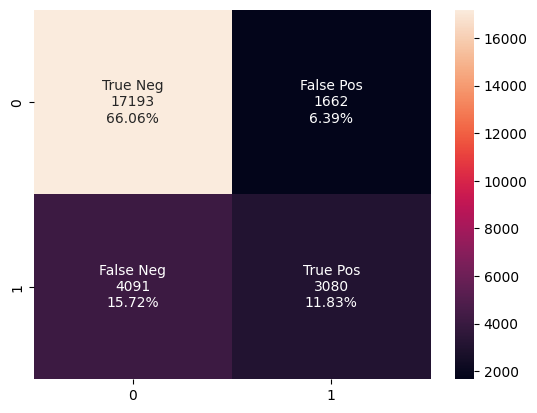

In [81]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_knn)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='')

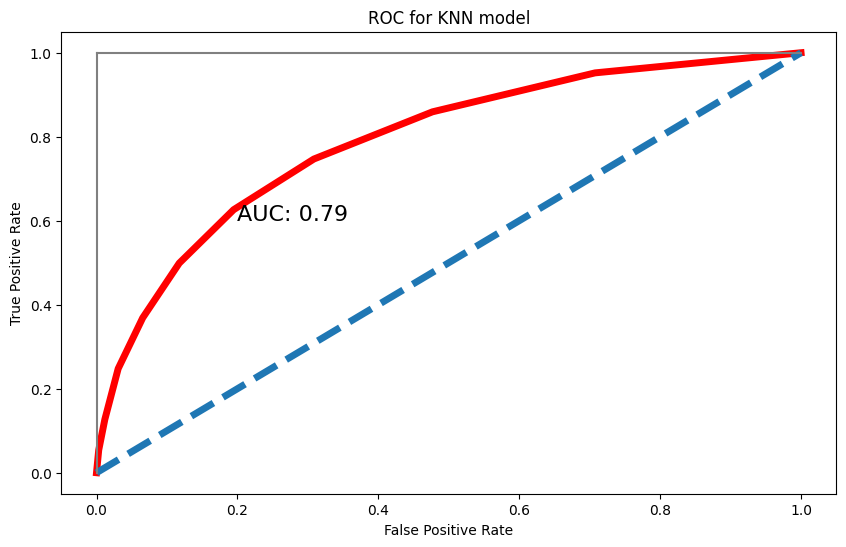

In [82]:
#ROC curve for KNN
from sklearn.metrics import roc_auc_score,roc_curve
y_probabilities =  knn.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold_knn = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(10,6))
plt.title('ROC for KNN model')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='red')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Compare K values and KNN accuracies

Maximum accuracy:- 0.7789518174133558 at K = 7


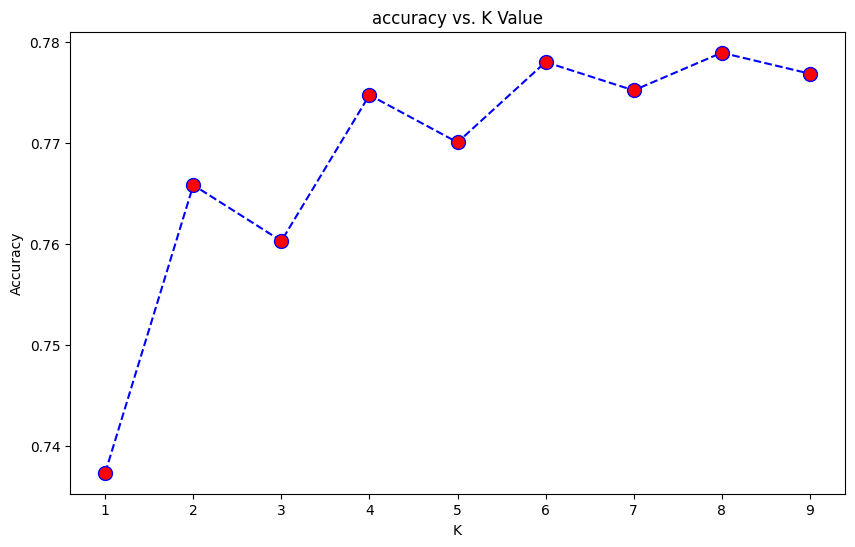

In [83]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,10):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,10),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

## Random Forest Model

In [84]:
from sklearn.ensemble import RandomForestClassifier
rd_clf = RandomForestClassifier(n_estimators = 112, min_samples_split = 4)
rd_clf.fit(X_train, y_train)

y_pred_rd_clf = rd_clf.predict(X_test)

acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)
conf = confusion_matrix(y_test, y_pred_rd_clf)
clf_report = classification_report(y_test, y_pred_rd_clf)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Random Forest is : 0.8096134634596173
Confusion Matrix : 
[[17241  1614]
 [ 3341  3830]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.84      0.91      0.87     18855
           1       0.70      0.53      0.61      7171

    accuracy                           0.81     26026
   macro avg       0.77      0.72      0.74     26026
weighted avg       0.80      0.81      0.80     26026



## Results For Random Forest Model

<Axes: >

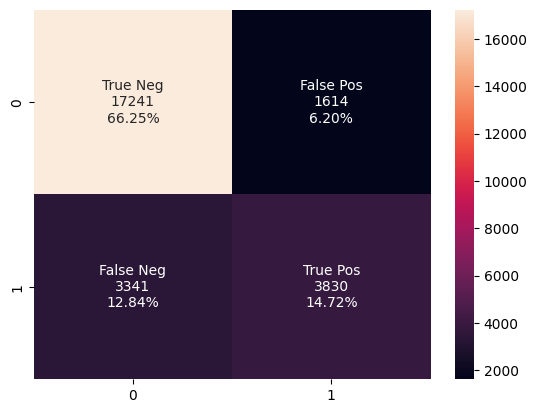

In [85]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_rd_clf)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='')

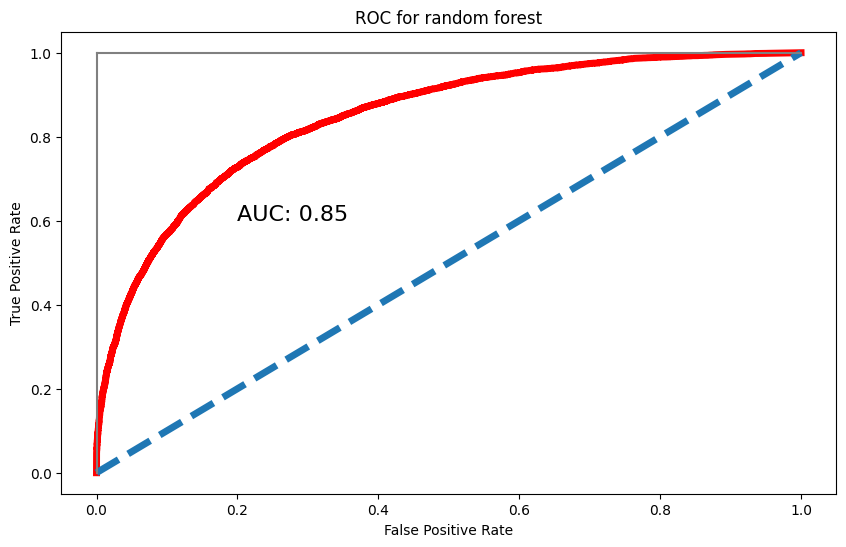

In [86]:
from sklearn.metrics import roc_auc_score,roc_curve
y_probabilities = rd_clf.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold_knn = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(10,6))
plt.title('ROC for random forest')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='red')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Hyperparameter tuning for Random Forest Model

In [87]:
print(rd_clf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 4, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 112, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [88]:
results = []
for i in range(100, 130):
   RF_model_i = RandomForestClassifier(criterion="gini",   n_estimators=i, oob_score=True)
   RF_model_i.id = [i]  # dynamically add fields to objects
   RF_model_i.fit(X_train, y_train)
   y_predict_i =   RF_model_i.predict(X_test)
   accuracy_i = [accuracy_score(y_test, y_predict_i), i]
   results.append(accuracy_i) # put the result on a list within the for-loop

KeyboardInterrupt: 

In [ ]:
print(results)

In [ ]:
# Extract the accuracy and number of estimators from the results
accuracies = [acc for acc, i in results]
n_estimators = [i for acc, i in results]

# Plot the results
plt.plot(n_estimators, accuracies)
plt.title('Accuracy vs Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.show()

## Plotting Decision tree

In [ ]:
#commented as the below comoputation takes 1 hr time
# from sklearn.tree import DecisionTreeClassifier
# classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
# classifier.fit(X_train, y_train)
# from sklearn import tree
# from matplotlib import pyplot as plt
# fig = plt.figure ( figsize = (100,100) )
# _ = tree.plot_tree ( classifier ,
#                     feature_names= X_train.columns,
#                     class_names = { 0 : 'not canceled', 1: 'canceled'},
#                     filled = True ,
#                    fontsize = 12 )

## Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb_clf = MultinomialNB(alpha=1.0, fit_prior=True)
mnb_clf.fit(X_train, y_train)

y_pred_mnb_clf = mnb_clf.predict(X_test)

acc_mnb_clf = accuracy_score(y_test, y_pred_mnb_clf)
conf = confusion_matrix(y_test, y_pred_mnb_clf)
clf_report = classification_report(y_test, y_pred_mnb_clf)

print(f"Accuracy Score of Multinomial naive bayes is : {acc_mnb_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

## Results for Multinomial Naive Bayes Model

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve
y_probabilities = mnb_clf.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold_knn = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(10,6))
plt.title('ROC for Naive Bayes')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='red')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_mnb_clf)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='')

## Prior and feature Probabilities for multinomial Naaive Bayes model

In [ ]:
import numpy as np

# Calculate the class priors based on the frequency of each class
class_counts = np.bincount(y_train)
class_priors = class_counts / len(y_train)

# Print the class priors
print("Class priors:")
print(class_priors)

# Print the feature probabilities
print("Feature probabilities:")
print( mnb_clf.feature_log_prob_)

# Logistic regression model prediction

In [91]:
#logistic regression for classification report
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=3000, solver='sag', penalty='l2')
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)

print(f"Accuracy Score of Logistic Regression is : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression is : 0.7769538154153539
Confusion Matrix : 
[[17864   991]
 [ 4814  2357]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.79      0.95      0.86     18855
           1       0.70      0.33      0.45      7171

    accuracy                           0.78     26026
   macro avg       0.75      0.64      0.65     26026
weighted avg       0.76      0.78      0.75     26026



# Plot to show relation between hyper params and accuracy obtained

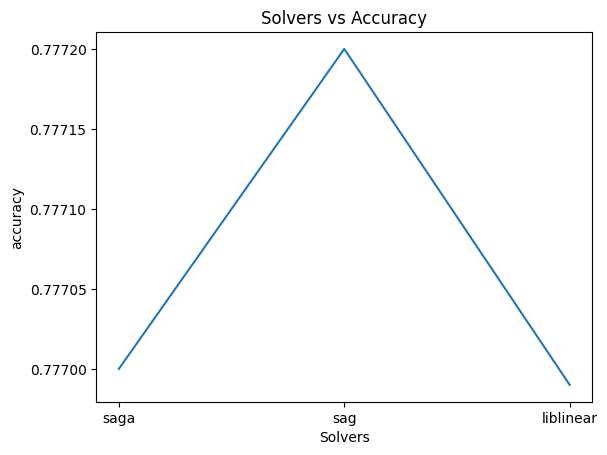

In [92]:
#plot to show relation between hyper params and accuracy obtained
import matplotlib.pyplot as plt

# define the lists
solvers = ["saga", "sag","liblinear"]
accuracy = [0.7770, 0.7772, 0.77699 ]

# plot the line graph
plt.plot(solvers, accuracy)

# set the title and labels
plt.title("Solvers vs Accuracy")
plt.xlabel("Solvers")
plt.ylabel("accuracy")

# display the plot
plt.show()

# Confusion matrix

<Axes: >

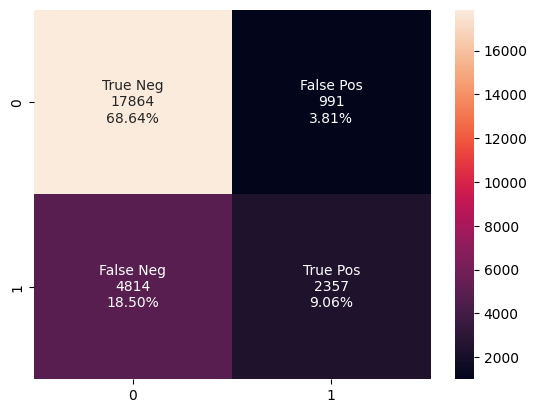

In [93]:
#plot to show the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_lr)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='')

# Plot ROC graph

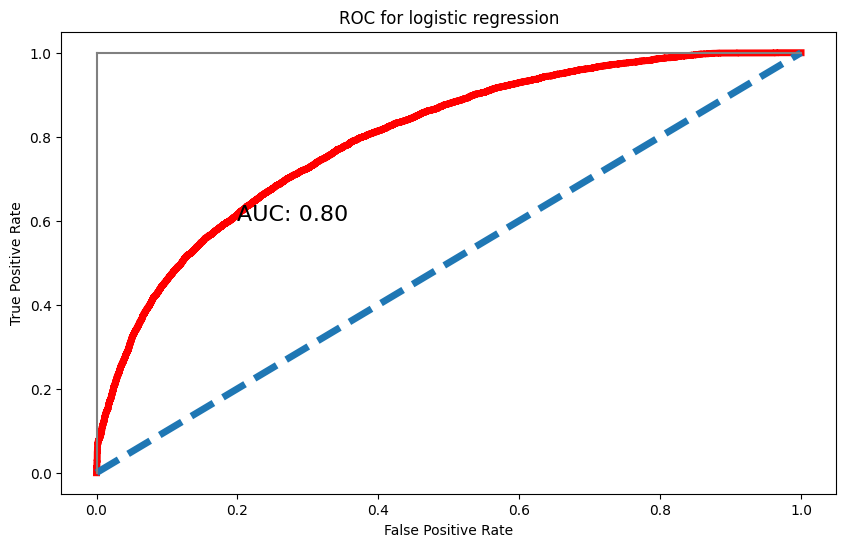

In [95]:
#plotting ROC graph
from sklearn.metrics import roc_auc_score,roc_curve
y_probabilities = lr.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold_lr = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(10,6))
plt.title('ROC for logistic regression')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='red')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Support vector machine Prediction and classification report

In [96]:
#SVM
from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.svm import SVC
    
#use rbf for better accuracy compared to linear
#model1(SVC(kernel = 'rbf'), X_train, X_test, y_train, y_test)

alg_svm = SVC(kernel = 'rbf', C = 1, gamma = 0.1)
alg_svm.fit(X_train, y_train)
y_pred_svm = alg_svm.predict(X_test)

acc_svm = accuracy_score(y_test, y_pred_svm)
conf_svm = confusion_matrix(y_test, y_pred_svm)
clf_report_svm = classification_report(y_test, y_pred_svm)

print(f"Accuracy Score of SVM model is : {acc_svm}")
print(f"Confusion Matrix : \n{conf_svm}")
print(f"Classification Report : \n{clf_report_svm}")

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Accuracy Score of SVM model is : 0.8037347268116499
Confusion Matrix : 
[[17560  1295]
 [ 3813  3358]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.82      0.93      0.87     18855
           1       0.72      0.47      0.57      7171

    accuracy                           0.80     26026
   macro avg       0.77      0.70      0.72     26026
weighted avg       0.79      0.80      0.79     26026



# Gridsearch CV to set ideal hyper value paramters

In [97]:
# #to find the best params fit, commeting below code as it takes lot of time for computation
# from sklearn.model_selection import GridSearchCV
  
# # defining parameter range
# param_grid = {'C': [0.1, 1], 
#               'gamma': [0.1],
#               'kernel': ['rbf', 'sigmoid']} 
  
# grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# # fitting the model for grid search
# grid.fit(X_train, y_train)



# # print best parameter after tuning
# print(grid.best_params_)
  
# # print how our model looks after hyper-parameter tuning
# print(grid.best_estimator_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.789 total time=   6.0s


KeyboardInterrupt: 

# Confusion matrix for SVM

<Axes: >

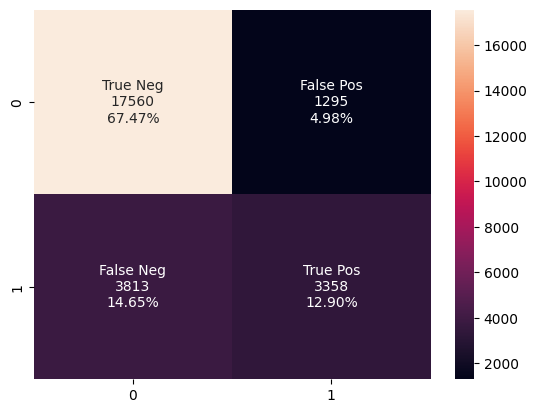

In [98]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_svm)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='')

# ROC graph

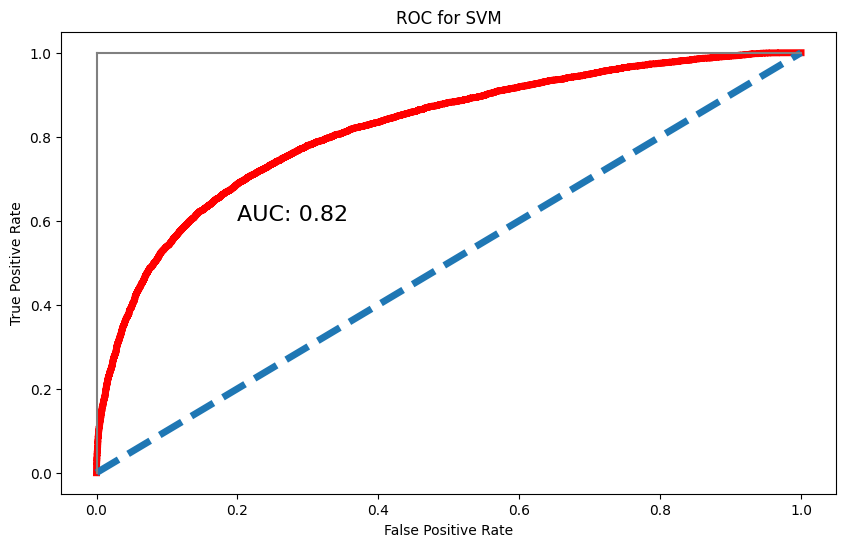

In [99]:
#plotting ROC graph
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.calibration import CalibratedClassifierCV
y_probabilities = ((CalibratedClassifierCV(SVC(kernel = 'rbf', C = 1, gamma = 0.1))).fit(X_train, y_train)).predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold_lr = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(10,6))
plt.title('ROC for SVM')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='red')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()